In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df = pd.read_csv("index/SPX.csv")
df["Dates"] = pd.to_datetime(df["Dates"])

In [21]:
df.head()

,Dates,Open,Close
0,2023-05-19 09:30:00,4204.15,4211.47
1,2023-05-19 10:00:00,4211.59,4211.38
2,2023-05-19 10:30:00,4211.24,4209.03
3,2023-05-19 11:00:00,4209.00,4191.72
4,2023-05-19 11:30:00,4191.48,4191.13


In [22]:
sx5e_start = df.loc[df.groupby(df.Dates.dt.date, as_index=False).Dates.idxmin().Dates, ["Dates", "Open"]]
sx5e_start.rename(columns={"Dates": "Open Time"}, inplace=True)
sx5e_start["Dates"] = sx5e_start["Open Time"].dt.date
sx5e_start.set_index("Dates", inplace=True)
sx5e_start.head()

,Open Time,Open
Dates,,
2023-05-19,2023-05-19 09:30:00,4204.15
2023-05-22,2023-05-22 09:30:00,4190.78
2023-05-23,2023-05-23 09:30:00,4176.80
2023-05-24,2023-05-24 09:30:00,4132.96
2023-05-25,2023-05-25 09:30:00,4155.71


In [23]:
sx5e_end = df.loc[df.groupby(df.Dates.dt.date, as_index=False).Dates.idxmax().Dates, ["Dates", "Close"]]
sx5e_end.rename(columns={"Dates": "Close Time"}, inplace=True)
sx5e_end["Dates"] = sx5e_end["Close Time"].dt.date
sx5e_end.set_index("Dates", inplace=True)
sx5e_end.head()

,Close Time,Close
Dates,,
2023-05-19,2023-05-19 16:00:00,4191.98
2023-05-22,2023-05-22 16:00:00,4192.63
2023-05-23,2023-05-23 16:00:00,4145.58
2023-05-24,2023-05-24 16:00:00,4115.24
2023-05-25,2023-05-25 16:00:00,4151.28


In [24]:
sx5e_ret = pd.merge(left=sx5e_start, right=sx5e_end, left_index=True, right_index=True, how="inner")
sx5e_ret["IntradayRet"] = sx5e_ret["Close"] / sx5e_ret["Open"] - 1
sx5e_ret.head()

,Open Time,Open,Close Time,Close,IntradayRet
Dates,,,,,
2023-05-19,2023-05-19 09:30:00,4204.15,2023-05-19 16:00:00,4191.98,-0.002895
2023-05-22,2023-05-22 09:30:00,4190.78,2023-05-22 16:00:00,4192.63,0.000441
2023-05-23,2023-05-23 09:30:00,4176.80,2023-05-23 16:00:00,4145.58,-0.007475
2023-05-24,2023-05-24 09:30:00,4132.96,2023-05-24 16:00:00,4115.24,-0.004287
2023-05-25,2023-05-25 09:30:00,4155.71,2023-05-25 16:00:00,4151.28,-0.001066


In [25]:
sx5e_ret.to_csv("SPX_daily_bar.csv")

<Axes: xlabel='Dates'>

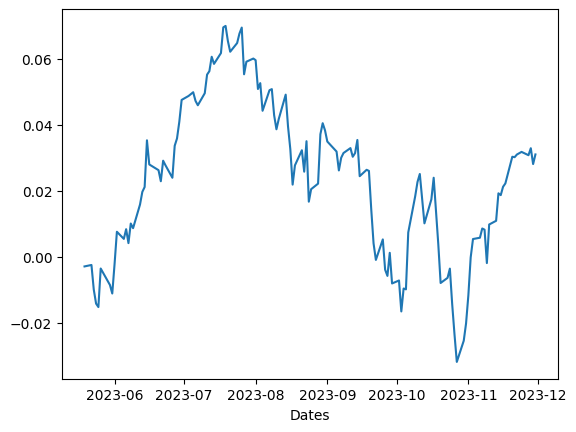

In [26]:
((sx5e_ret["IntradayRet"] + 1).cumprod() - 1).plot()